# Capstone Assignment Three

## Which city is best to open an Italian Restaurant?

#### Introduction
###### The audience could be a board who own a restaurant chain and are interested in continuing the successful restaurant in another capital city. I have suggested analysing London, Paris, New York, Toronto, San Francisco, Berlin, Moscow , Athens and Madrid. 

#### Data
###### The data is retrieved from foursquare using a search query "Italian Restaurant". Json packets return with information about the venue such as location, the type of cuisine, number of likes and other information. Specific details about the venue using the "Stats" feature is unfortunatley not accessable although it would have been very useful. Another downside is that only 50 venues are returned using foursquare. The data is of venues within 20km radius from the city centre (Mahattan in the case of New York), and the most important feature that has been extracted from the json scripts for this case is the cuisine type. As expected (perhaps human error or further investigation needed), not all of the results are related to Italian cuisine; the data is filtered for references containing only the words or "Italian".

#### Methodology
###### The data returns the cuisine type so a simple approach is to count the number of times "Italian" comes up in each city, however it must be divided by the population number and reperesented as per capita. I chose this measurement to be the number of Italian venues per 100,000 citiziens in each city - this would be a way to show demand and popularity

#### Results
###### The city with most Italian venues per 100000 citizens was Athens, followed by San Francisco and finally Manhattan, New York. Toronto is 4th and London is 5th. It was interesting to see why this is so a results table of the Italian population in each city was made. The number of Italian restaurants per capita could be related to the size of the Italian population in a city, the table at the bottom of the notebook was from wikipedia demographic searches. It's expected that the higher the Italian population, the more likely you are to find Italian cuisine but this is not always true.

#### Discussion
###### It is important to know why there is a popularity in each city so looking at Italian population is a good place to start. It's expected that the higher the Italian population, the more likely you are to find Italian cuisine but this is not always true. This could be because the data is not sophisticated. Athens population was obtained by assuming that all Italian speaking people resided in Athens as there was no clear information regarding the demographics of Italians in Athens, this was the same for London. Some are figures of the people claiming Italian ancestry such as in New York, San Francisco and Toronto. Sometimes it isn't clear such as in the case of Paris and Madrid, where the population could be Italian citizens, have Italian ancestry or a mixture of both. What is true though is that in Athens, San Francisco and Manhattan Italian restaurants are popular and it seems that there is a demand for them in these cities.

###### It is worth bearing in mind that the meditteranean is a very touristy region and the number of restaurants in this region is probably higher in proportion than other places; in this case it would help if foursquare could send more than 50 results for a call to each city so that the data is more representative of reality; only a sample of the complete data has been analysed. San Francisco is also relatively dense but the Italian population is low, this shows that Italian cuisine is popular regardless of the ethnic makeup of the city but the reason should be further investigated. It's unsurprising that Manhattan has plenty of Italian restaurants as it is actually the city with the largest Italian population in the US. It would also be unsurprising if foursquare returned more results and thus increase the density.

#### Conclusion

###### Athens, San Francisco and Manhattan should be the best candidates for expanding the chain into but further research needs to be invested in. The questions should be why in Athens and San Francisco are Italian restaurants relatively popular of the list. The first priority however is to use a complete set of data rather than 50 results, these cities are very large. The stats feature from foursqaure could also be very useful, you could do a further investigation as to how much of the attributes of a restaurant such as location in a city, cuisine type and study of the tips impacts the profit and number of visits per day using multiple linear regression. This data could only be used by the owner of the restaurant however. 

#### References: 
###### Below are the links to the pages that provide the Italian population in each city. After lengthy searches, not much could be found on Moscow.

###### [1] https://en.wikipedia.org/wiki/Languages_of_Greece language 894697
###### [2] https://en.wikipedia.org/wiki/Demographics_of_Greece 
###### [3] https://en.wikipedia.org/wiki/Demographics_of_San_Francisco ancestry 20696
###### [4] https://en.wikipedia.org/wiki/Demographics_of_New_York_City#Italian ancestry 692,739
###### [5] https://en.wikipedia.org/wiki/Italian_Canadians_in_the_Greater_Toronto_Area ancestry 182,495
###### [6] https://en.wikipedia.org/wiki/Demography_of_London language 53400
###### [7] https://en.wikipedia.org/wiki/Demographics_of_France unclear if citizen population or ancestry 56692
###### [8] https://en.wikipedia.org/wiki/Berlin_population_statistics ~ nationality 20000
###### [9] https://en.wikipedia.org/wiki/Madrid#Demographics - 23894




# Dataframe, bar chart and population table are the results and near the bottom of the notebook.

In [3]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
import json # library to handle JSON files
#-------------------------------------------------
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#-------------------------------------------------
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#-------------------------------------------------
# import k-means from clustering stage
from sklearn.cluster import KMeans
#-------------------------------------------------
#
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#-------------------------------------------------
print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [3]:
CLIENT_ID = '5J5EM2PASASPW1ZPYCPNH4IQDVAPCGIIRLAI34BEAGIGFWH0' # your Foursquare ID
CLIENT_SECRET = '12QV4XUHJSKE4V4U0SQL3KPIM1JHGL5PUWHGQLVDEQAX1L2I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5J5EM2PASASPW1ZPYCPNH4IQDVAPCGIIRLAI34BEAGIGFWH0
CLIENT_SECRET:12QV4XUHJSKE4V4U0SQL3KPIM1JHGL5PUWHGQLVDEQAX1L2I


#### The function Settings has to be looped over so I have made it into a function.

In [4]:
def Settings(i,radius,limit,search_query):
    address = '{}'.format(cities[i])
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))
    urlsearch = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,latitude,longitude,VERSION,search_query,radius,limit)
    resultssearch=requests.get(urlsearch).json()
    return resultssearch

#### Below parameters of Settings are declared. The search query, radius and limit for the parameters. The list of cities is also declared.

In [5]:
cities=('London','Paris','Manhattan','Toronto','San Francisco','Berlin','Moscow','Athens','Madrid')
rest = []
df=[]
locations=[]
radius=20000
limit=1000
search_query='Italian Restaurant'

for i in range(len(cities)):
    resultssearch=Settings(i,radius,limit,search_query)
    rest=[]
    for j in range(len(resultssearch['response']['venues'])):
        if resultssearch['response']['venues'][j]['categories']!=[]:
            rest.append(resultssearch['response']['venues'][j]['categories'])
        #locations.append(resultssearch[])
    df.append(rest)
    
GlobalRestaurants=pd.DataFrame(df).T
GlobalRestaurants=GlobalRestaurants.set_axis(cities,axis=1,inplace=False)



The geograpical coordinate of London are 51.5073219, -0.1276474.
The geograpical coordinate of Paris are 48.8566101, 2.3514992.
The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.
The geograpical coordinate of Toronto are 43.653963, -79.387207.
The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.
The geograpical coordinate of Berlin are 52.5170365, 13.3888599.
The geograpical coordinate of Moscow are 55.7504461, 37.6174943.
The geograpical coordinate of Athens are 33.9597677, -83.376398.
The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


##### The code block below populates GlobalRestaurantsCuisine which is the list of all types of cuisine associated with the search "italian restaurant". This dataframe is assessed by eye, I was interested in the results associated with the search and filter out anything unrelated. I have also counted the terms with "Pizza" in the data as Italian cuisine.  

In [6]:
GlobalRestaurantsCuisine=[]
for i in range(len(cities)):
    cuisine=[]
    for j in range(len(GlobalRestaurants[cities[i]])):
        if GlobalRestaurants[cities[i]][j] is not None:
            cuisine.append(GlobalRestaurants[cities[i]][j][0]['name'])
    
    GlobalRestaurantsCuisine.append(cuisine) 
    
GlobalRestaurantsCuisine=pd.DataFrame(GlobalRestaurantsCuisine).T.set_axis(cities,axis=1,inplace=False)
GlobalRestaurantsCuisine

,London,Paris,Manhattan,Toronto,San Francisco,Berlin,Moscow,Athens,Madrid
0,Italian Restaurant,French Restaurant,Italian Restaurant,Italian Restaurant,Pizza Place,Japanese Restaurant,Italian Restaurant,Pizza Place,Café
1,Italian Restaurant,Café,Italian Restaurant,Italian Restaurant,Italian Restaurant,Breakfast Spot,Embassy / Consulate,Italian Restaurant,Restaurant
2,Italian Restaurant,Italian Restaurant,Italian Restaurant,Restaurant,Italian Restaurant,German Restaurant,Italian Restaurant,Pizza Place,Mediterranean Restaurant
3,Italian Restaurant,French Restaurant,Italian Restaurant,American Restaurant,Food,Restaurant,Chinese Restaurant,Italian Restaurant,Paella Restaurant
4,Italian Restaurant,Monument / Landmark,Italian Restaurant,Italian Restaurant,Pizza Place,Embassy / Consulate,Pizza Place,Breakfast Spot,Mediterranean Restaurant
5,Italian Restaurant,Gourmet Shop,Italian Restaurant,American Restaurant,Food,Vegetarian / Vegan Restaurant,Winery,Food,Performing Arts Venue
6,Italian Restaurant,Vietnamese Restaurant,Italian Restaurant,Dim Sum Restaurant,Italian Restaurant,French Restaurant,Eastern European Restaurant,Japanese Restaurant,Boutique
7,Italian Restaurant,Italian Restaurant,Italian Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Seafood Restaurant,Chinese Restaurant,Spanish Restaurant
8,Italian Restaurant,Turkish Restaurant,Italian Restaurant,Embassy / Consulate,Italian Restaurant,Restaurant,Nightclub,Fried Chicken Joint,Spanish Restaurant
9,Italian Restaurant,French Restaurant,Pizza Place,Italian Restaurant,Italian Restaurant,German Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant


#### Create a dataframe of all the terms that suggest Italian cuisine, count the number and compare with population, convert to bar chart.

In [7]:
from itertools import compress
FreqTab=[]

for i in range(len(cities)):
    x=GlobalRestaurantsCuisine[cities[i]].str.contains('Italian|Pizza',case=False) # search for Pizza and Italian
    f=len(list(compress(GlobalRestaurantsCuisine[cities[i]], x)))
    FreqTab.append(f)
FreqTab
FreqTab = [i*100000 for i in FreqTab]

pop=(8900000.0,2141000.0,8623000.0,2930000.0,884363.0,3748000.0,11920000,664000.0,6550000.0)
for i in range(len(pop)):
    FreqTab[i]=FreqTab[i]/pop[i]
    
FreqTab=pd.DataFrame(FreqTab).T
FreqTab.set_axis(cities,axis=1,inplace=True)
FreqTab

,London,Paris,Manhattan,Toronto,San Francisco,Berlin,Moscow,Athens,Madrid
0,0.314607,0.140121,0.52186,0.341297,1.017682,0.133404,0.058725,1.506024,0.061069


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


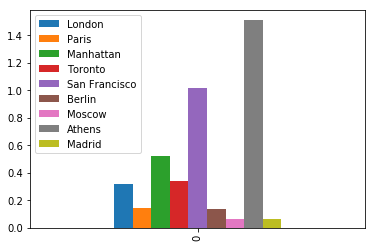

In [8]:
p=FreqTab.plot.bar()
ax1 = plt.axes()
ax1.xaxis.label.set_visible(False)

#### In case the bar chart does not print out (been having issues with github), here is a pasted image. In order of highest to lowest, the first three values (as in the data frame) are 1.506, 1.017 and 0.533. The axes did not copy in the pasted image.
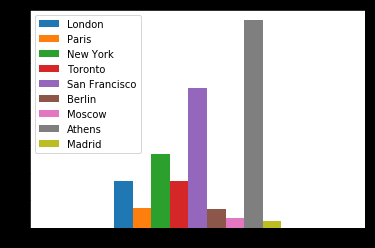

In [9]:
ItalianPopulation = {'City':['Athens', 'San Francisco', 'New York', 'Toronto', 'London', 'Paris', 'Berlin', 'Moscow', 'Madrid'], 'No. Population':[894697,20696,692739,182495,53400,174000,20000,'?',23894]}

In [11]:
ItalianPopulation = pd.DataFrame(ItalianPopulation)
ItalianPopulation

,City,No. Population
0,Athens,894697
1,San Francisco,20696
2,New York,692739
3,Toronto,182495
4,London,53400
5,Paris,174000
6,Berlin,20000
7,Moscow,?
8,Madrid,23894
